In [7]:
import tensorflow as tf
import numpy as np
from sklearn.utils import shuffle
%matplotlib inline
import matplotlib.pyplot as plt 

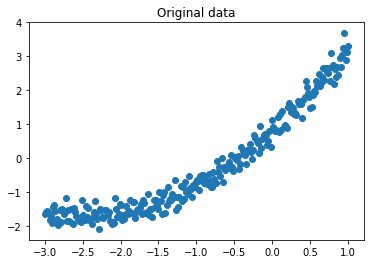

In [8]:
trainsamples = 200
testsamples = 60

#Here we will represent the model, a simple imput, a hidden layer of sigmoid activation
def model(X, hidden_weights1, hidden_bias1, ow):
    hidden_layer = tf.nn.sigmoid(tf.matmul(X, hidden_weights1)+ b)
    return tf.matmul(hidden_layer, ow)

dsX = np.linspace(-3, 1, trainsamples + testsamples,dtype=np.float32).transpose()
dsY = 0.4* pow(dsX,2) +2 * dsX + np.random.randn(*dsX.shape) * 0.22 + 0.8 
dsXt=dsX
plt.figure() # Create a new figure
plt.title('Original data')
plt.scatter(dsX,dsY) #Plot a scatter draw of the  datapoints 

In [11]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

hw1 = tf.Variable(tf.random_normal([1, 10], stddev=0.01)) # Create first hidden layer
ow = tf.Variable(tf.random_normal([10, 1], stddev=0.01)) # Create output connection
b = tf.Variable(tf.random_normal([10], stddev=0.01)) # Create bias

model_y = model(X, hw1, b, ow) #

cost = tf.pow(model_y-Y, 2)/(2) # Cost function

train_op = tf.train.AdamOptimizer(0.01).minimize(cost) # construct an optimizer

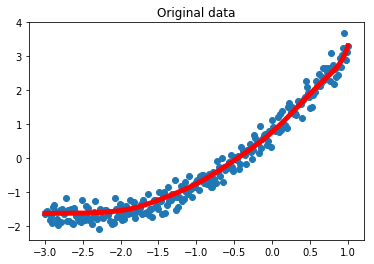

In [12]:
# Launch the graph in a session
with tf.Session() as sess:
    tf.global_variables_initializer().run() #Initialize all variables
    tf.train.write_graph(sess.graph, './graphs','graph.pbtxt')
    writer = tf.summary.FileWriter('./graphs', sess.graph)
    for i in range(1,20000):
        
        trainX, trainY =dsX[0:trainsamples], dsY[0:trainsamples]
        for x1,y1 in zip (trainX, trainY):
            sess.run(train_op, feed_dict={X: [[x1]], Y: y1})
            
        testX, testY = dsX[trainsamples:trainsamples + testsamples], dsY[trainsamples:trainsamples+testsamples]
        cost1=0.
        for x1,y1 in zip (testX, testY):
            #print([[x1]],y1)
            cost1 += sess.run(cost, feed_dict={X: [[x1]], Y: y1}) / testsamples       
      #  print( "Average cost for epoch " + str (i) + ":" + str(cost1))
        dsX, dsY = shuffle (dsX, dsY) #We randomize the samples to implement a better training            
    dsX2=tf.reshape(dsXt,[trainsamples + testsamples,1])
    dsY2= model(dsX2, hw1, b, ow)
#    dsY2=tf.reshape(dsY2,[1,trainsamples + testsamples])
#    print(sess.run(dsY2))
#    print(dsX2)
    plt.figure() # Create a new figure
    plt.title('Original data')
    plt.scatter(dsX,dsY) #Plot a scatter draw of the  datapoints
    plt.plot(sess.run(dsX2),sess.run(dsY2),'r-',lw=5)